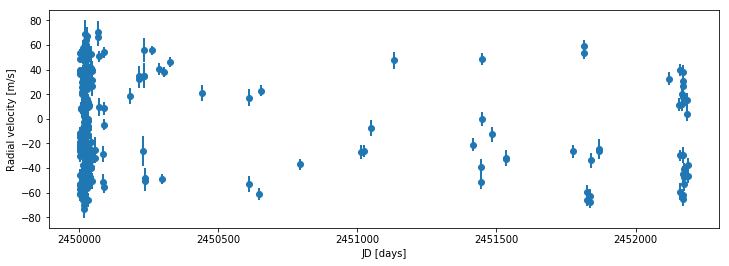

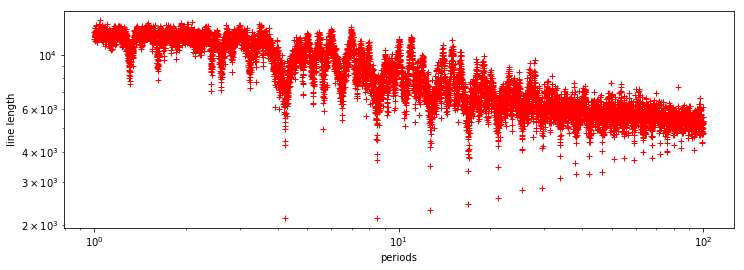

4.233140335346036
3133


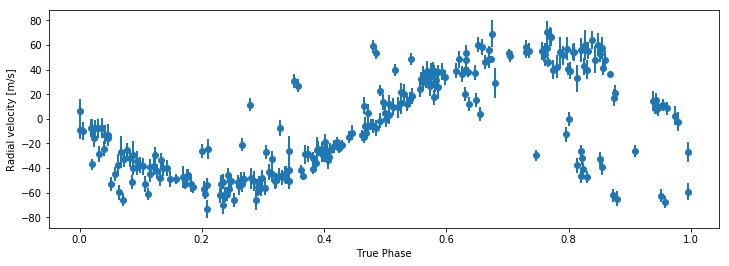

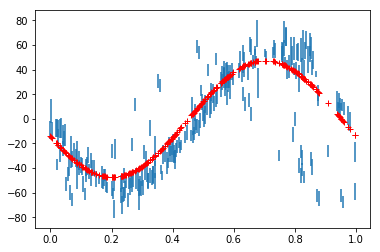

a = -47.31384379206883 +/- 2.0307326188238477


In [49]:
#part 1

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from astropy.stats import LombScargle
from scipy.optimize import curve_fit
import math
import pandas as pd
import os
import seaborn as sns

#Windows current directory
cd = 'C:\\Users\\seacr\\Desktop\\Germany\\2018WS\\Python\\UID_0113357_RVC_001.tbl'

#trying to make OS independent file path
file_path = os.path.split(cd)
#print(file_path)
#print( file_path[0] + file_path[1] )

#changing the directory
os.chdir(file_path[0])

#reading in the datafile
data = np.loadtxt(file_path[1], comments = ['\\','|'])
#print(data[0:5])

#retrieving the columns
time = data[:, 0] #The first column is the time in days
vel = data[:,1] #the second column is the radial velocity in m/s
err= data[:,2] #the third column is the uncertainty in the radial velocity in m/s. 

#plotting the data
plt.figure(figsize=(12,4))
plt.errorbar(time, vel,yerr=err, marker = 'o', elinewidth = 2, lw = 0)
plt.xlabel('JD [days]')
plt.ylabel('Radial velocity [m/s]')
plt.show()

#creating periods
periods = np.logspace(0.0, 2, num=10000)

#assigning large initial value for minimum line length
min_length = 99999999999
length = np.zeros(len(periods))
min_period = 0

#doing the algorithm
for i in range(len(periods)):
    phase = (time % periods[i]) / periods[i]
    sorted_vel = vel[np.argsort(phase)]
    phase = np.sort(phase)    
    temp_length = (np.diff(phase)**2 + np.diff(sorted_vel)**2)**0.5
    temp_length = sum(temp_length)
    length[i] = temp_length
    #print(temp_length)
    
    if temp_length < min_length:
        min_length = temp_length
        
#print(min_length)

#plotting the log-log  of the string length versus the period
plt.figure(figsize=(12,4))
plt.loglog(periods, length, 'r+')
plt.xlabel('periods')
plt.ylabel('line length')
plt.show()

# The graph shows that there is a periodic fluctuation in line length!
# We have to find the period which corresponds to the first clear minimum as it will be the period value we are looking for 
# and th other periods with local minima would be a multiplied value of the first value

#finding the first local minima
true_period = 0
idx = 0 #the index for the period
for i in range(len(periods)):
    if length[i] < 3*10**3:
        true_period = periods[i+1]
        idx = i+1
        #print(i+1)
        break
#print(true_period)
#print(idx)

#plotting radial velocity (with error bars) versus phase for the period
true_phase = (time % periods[idx]) / periods[idx]
plt.figure(figsize=(12,4))
plt.errorbar(true_phase, vel,yerr=err, marker = 'o', elinewidth = 2, lw = 0)
plt.xlabel('True Phase')
plt.ylabel('Radial velocity [m/s]')
plt.show()

#defining the curve
def curve(x, a, b):
    return a * np.sin(2*np.pi*x+b)

#fitting the graph into curve
popt, pcov = curve_fit(curve, true_phase, vel)
plt.errorbar(true_phase, vel, yerr=err, fmt="none")
xfine = true_phase
plt.plot(xfine, curve(xfine, *popt), 'r+')
plt.show()

#printing out the possible range of  a
print("a =", popt[0], "+/-", pcov[0,0]**0.5)

